In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

import numpy as np
from pprint import pprint
from scipy.stats import poisson
from pprint import pprint
import pandas as pd
from shapely.geometry import Point

# import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (20,10)

from tputils import * 

Populating the interactive namespace from numpy and matplotlib


/home/tom/.pyenv/versions/3.6.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Load and Clean Data
 - load the data from both files 
 - concatenate them
 - merge acqdate and acq_time
 -  create coordinates column for plotting

In [2]:
def clean_time(df):
    hours = (df.acq_time//100).apply(str)
    minutes = (df.acq_time%100).apply(str)
    df.acq_date = pd.to_datetime(df.acq_date + " " + hours + ":" + minutes, format='%Y-%m-%d %H:%M')
    del df["acq_time"]
    
def get_header(df):
    header = list(df.columns.values) 
    col2id = {col_name: i_col for i_col, col_name in enumerate(header)}
    return header, col2id

def concat_data(df_modis, df_viirs):
    
    # Confidence from modis is integer, in viirs is n/l/h
    df_modis["confidence_modis"] = df_modis["confidence"]
    del df_modis["confidence"]
    df_viirs["confidence_viirs"] = df_viirs["confidence"]
    del df_viirs["confidence"]
    
    df_fires = pd.concat([df_modis, df_viirs], ignore_index=True, sort=False)
    
    return df_fires

def prepare_coordinates(df):
    df['coordinates'] = list(zip(df.longitude, df.latitude))
    df['coordinates'] = df['coordinates'].apply(Point)

In [3]:
df_modis = pd.read_csv('data/fire_archive_M6_12555.csv')
df_viirs = pd.read_csv('data/fire_archive_V1_12556.csv')

df_fires = concat_data(df_modis, df_viirs)
clean_time(df_fires)
prepare_coordinates(df_fires)

header, col2id = get_header(df_fires)

df_fires

,latitude,longitude,brightness,scan,track,acq_date,satellite,instrument,version,bright_t31,frp,confidence_modis,bright_ti4,bright_ti5,confidence_viirs,coordinates
0,14.73700,-91.56400,305.8,2.30,1.50,2013-01-01 07:22:00,Aqua,MODIS,6.1,286.4,34.5,61.0,NaN,NaN,NaN,POINT (-91.56399999999999 14.737)
1,13.87000,-90.10100,300.6,1.80,1.30,2013-01-01 07:23:00,Aqua,MODIS,6.1,290.0,5.6,24.0,NaN,NaN,NaN,POINT (-90.101 13.87)
2,13.97800,-91.27800,326.8,1.00,1.00,2013-01-01 16:47:00,Terra,MODIS,6.1,300.2,17.1,78.0,NaN,NaN,NaN,POINT (-91.27799999999999 13.978)
3,13.97900,-91.28700,348.2,1.00,1.00,2013-01-01 16:47:00,Terra,MODIS,6.1,300.7,53.3,94.0,NaN,NaN,NaN,POINT (-91.28700000000001 13.979)
4,14.04600,-91.18400,315.4,1.00,1.00,2013-01-01 16:47:00,Terra,MODIS,6.1,292.5,7.9,44.0,NaN,NaN,NaN,POINT (-91.184 14.046)
5,14.39100,-91.44800,316.1,1.00,1.00,2013-01-01 16:47:00,Terra,MODIS,6.1,296.8,7.6,64.0,NaN,NaN,NaN,POINT (-91.44799999999999 14.391)
6,14.74200,-91.57100,314.6,1.00,1.00,2013-01-01 16:47:00,Terra,MODIS,6.1,290.1,9.6,25.0,NaN,NaN,NaN,POINT (-91.571 14.742)
7,13.99000,-90.45200,321.9,1.10,1.00,2013-01-01 16:47:00,Terra,MODIS,6.1,306.2,7.9,41.0,NaN,NaN,NaN,POINT (-90.45200000000001 13.99)
8,14.23500,-91.15100,320.3,1.00,1.00,2013-01-01 16:47:00,Terra,MODIS,6.1,299.1,10.3,63.0,NaN,NaN,NaN,POINT (-91.15100000000001 14.235)
9,14.39000,-91.43900,315.1,1.00,1.00,2013-01-01 16:47:00,Terra,MODIS,6.1,297.5,7.0,62.0,NaN,NaN,NaN,POINT (-91.43899999999999 14.39)


# Data analysis

In [4]:
df_fires.describe()

,latitude,longitude,brightness,scan,track,version,bright_t31,frp,confidence_modis,bright_ti4,bright_ti5
count,238357.000000,238357.000000,50243.000000,238357.000000,238357.000000,238357.000000,50243.000000,238357.000000,50243.000000,188114.000000,188114.000000
mean,15.772510,-90.358647,325.757379,0.703011,0.637551,2.075023,300.453430,15.123109,66.775909,336.638077,298.672971
std,1.159054,0.702121,13.352809,0.596201,0.332073,2.080135,6.355808,33.045354,18.901756,15.228877,8.769146
min,13.742340,-92.241940,300.000000,0.320000,0.360000,1.000000,264.700000,0.000000,0.000000,208.000000,227.800000
25%,14.632000,-90.850110,317.900000,0.410000,0.400000,1.000000,296.900000,3.900000,55.000000,332.100000,293.600000
50%,15.809830,-90.411980,323.700000,0.470000,0.510000,1.000000,301.000000,7.100000,69.000000,337.500000,299.500000
75%,16.845760,-89.833000,330.500000,0.630000,0.710000,1.000000,304.500000,14.600000,80.000000,344.200000,304.300000
max,17.816000,-88.265620,506.100000,4.800000,2.000000,6.100000,340.300000,4002.100000,100.000000,367.000000,380.000000


## Histograms

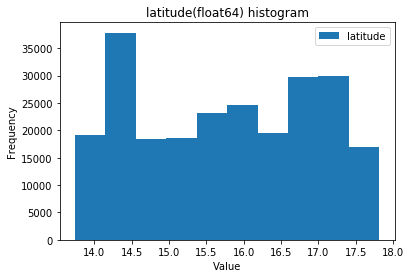

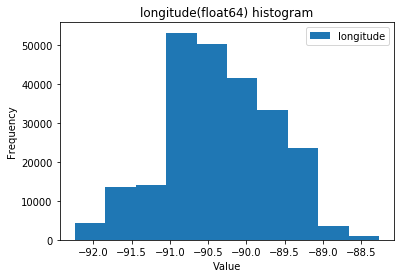

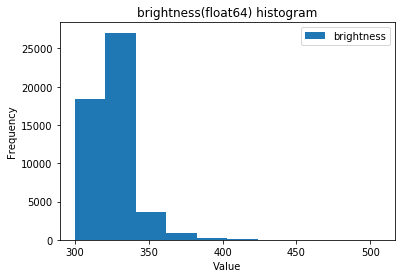

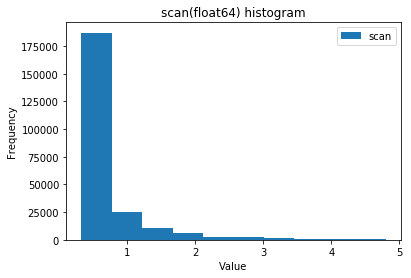

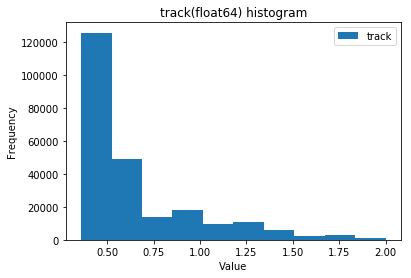

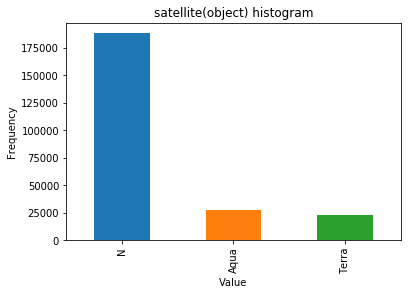

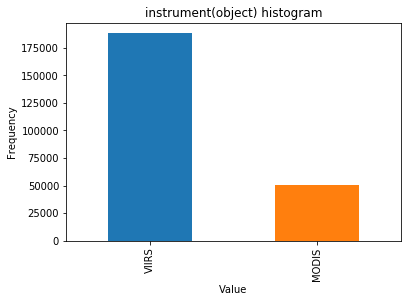

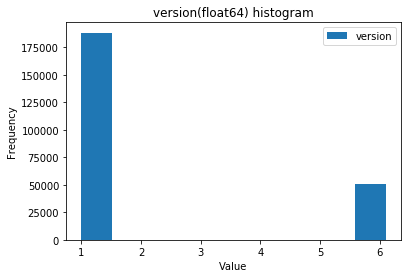

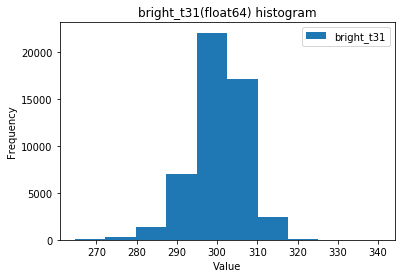

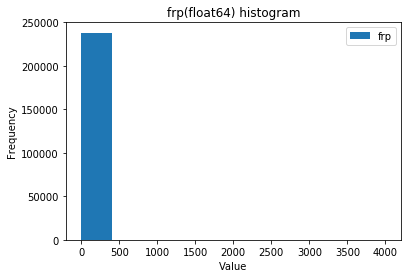

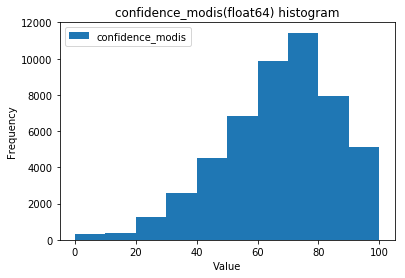

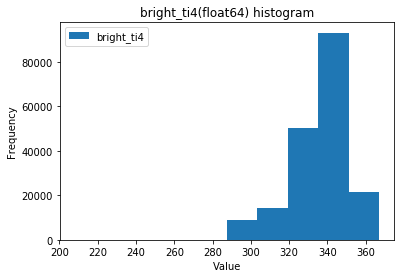

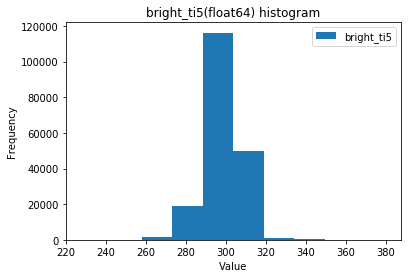

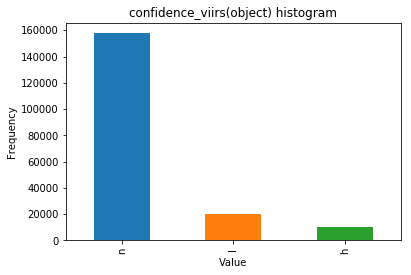

In [5]:
def plot_col_hist(df, header, skip=None):
    
    if skip is None:
        skip = []
        
    for col in header:
        
        if col in skip:
            continue
            
        if np.issubdtype(df[col].dtype, np.number):
            # Numerical values
            ax = df[[col]].plot.hist()
        else:
            # Categorical values
            plt.figure()
            ax = df[col].value_counts().plot(kind='bar')
            ax.set_ylabel("Frequency")
            
        ax.set_title("{}({}) histogram".format(col, df[col].dtype))
        ax.set_xlabel("Value")
            
plot_col_hist(df_fires, header, skip=["acq_date", "coordinates"])

 - lon, lat is correct
 - About 19k rows from VIIRS, 50k rows from MODIS
 - confidence int/str in modis/viirs

# Nr of Fires in Time

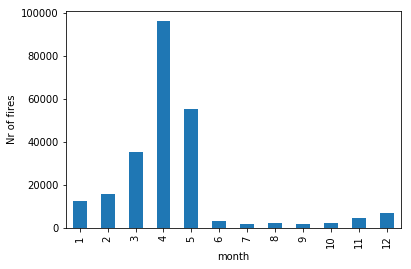

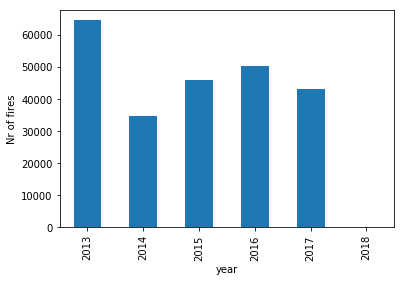

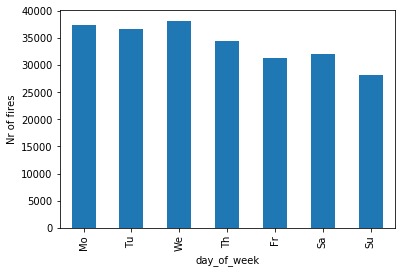

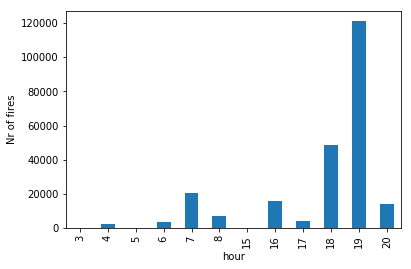

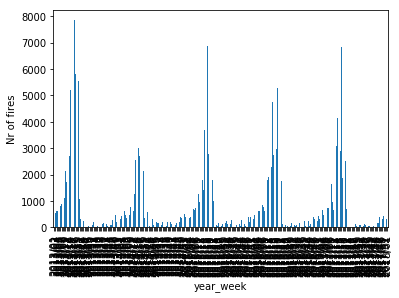

In [6]:
def plot_firecount_aggregate(df, col_date, agg_type):
    
    # Agg function
    if agg_type == "month":
        agg_fcn = lambda x: x.month
    elif agg_type == "year":
        agg_fcn = lambda x: x.year
    elif agg_type == "day_of_week":
        agg_fcn = lambda x: x.dayofweek
    elif agg_type == "hour":
        agg_fcn = lambda x: x.hour
    elif agg_type == "year_week":
        agg_fcn = lambda x: "{}/{:02d}".format(x.isocalendar()[0], x.isocalendar()[1])
    else:
        raise Exception("Invalid agg_type")
    
    # Plot
    df = df[[col_date]]
    df_counts = df.groupby([df[col_date].map(agg_fcn)], sort=True).agg("count")
    ax = df_counts.plot(kind="bar", legend=None)
    
    # Format
    ax.set_xlabel(agg_type)
    ax.set_ylabel("Nr of fires")
    if agg_type == "day_of_week":
        plt.xticks(range(7), ["Mo", "Tu", "We", "Th", "Fr", "Sa", "Su"])  # Map day of week nr to name

    
plot_firecount_aggregate(df_fires, col_date="acq_date", agg_type="month")
plot_firecount_aggregate(df_fires, col_date="acq_date", agg_type="year")
plot_firecount_aggregate(df_fires, col_date="acq_date", agg_type="day_of_week")
plot_firecount_aggregate(df_fires, col_date="acq_date", agg_type="hour")
plot_firecount_aggregate(df_fires, col_date="acq_date", agg_type="year_week")

 - most fires in March to May, less fires from June to December 
 - most fires in 2013
 - most fires in the beggining of the week, least fires Friday - Sunday
 - some hours fires not detected at all (maybe caused by satelite trajectories), most fires at 19 (can be influenced by satellite trajectories)
 - sorry for messy labels in last plot
 
 Instead of histograms violonplots or boxplots might be better. It would show also variances.

# Goegraphical Distribution of Fires

Load map of Guatemala

In [7]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
guatemala = world[world["name"] == "Guatemala"]

Convert dataframe to geopandas

In [8]:
gdf_fires = geopandas.GeoDataFrame(df_fires, geometry='coordinates')

Plot map and fires

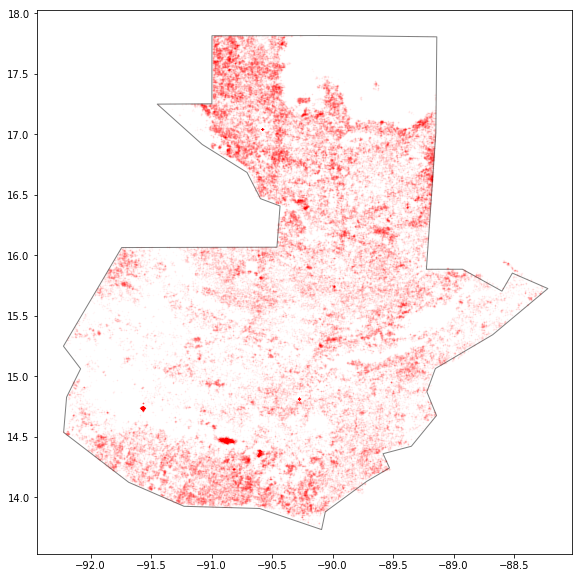

In [9]:
ax = guatemala.plot(figsize=(20, 10), color='white', edgecolor='gray')
gdf_fires.plot(ax=ax, color='r', markersize=1, alpha=0.02)

# Fire risk
The aim is to create a model that predicts if in the location will be fire in the current day. The prediction score can then be interpreted as a **fire risk score**

Define some useful functions

In [13]:
from datetime import timedelta, date

def daterange(start_date, end_date, step):
    for n in range(0, int((end_date - start_date).days), step):
        yield start_date + timedelta(n)

## Define location bins
Split all country to bins and predict fire for each location separately.

In [14]:
def get_bins(area_bins_lon, area_bins_lat, df):
    
    lon_min, lon_max = min(df["longitude"]), max(df["longitude"])
    lat_min, lat_max = min(df["latitude"]), max(df["latitude"])
    
    bins_lon = np.linspace(lon_min, lon_max, area_bins_lon + 1).tolist() 
    bins_lat = np.linspace(lat_min, lat_max, area_bins_lat + 1).tolist() 
    
    print(lon_min, lon_max, bins_lon)
    print(lat_min, lat_max, bins_lat)
    
    return bins_lon, bins_lat

# area_bins_lon, area_bins_lat = 20, 20
area_bins_lon, area_bins_lat = 2, 2
bins_lon, bins_lat = get_bins(area_bins_lon, area_bins_lat, df_fires)

-92.24194 -88.26562 [-92.24194, -90.25378, -88.26562]
13.742339999999999 17.816 [13.742339999999999, 15.779169999999999, 17.816]


# Prepare data
Iterate over days and location bins. For each data point calculate features and value (fire/no fire)

In [28]:
from  dateutil.relativedelta import relativedelta

def create_dataset(df, bins_lon, bins_lat):
    start_date = min(df["acq_date"]).date() + relativedelta(years=1)  # Starting 1 year ahead, because I need history for features
    end_date = max(df["acq_date"]).date()
    
    features0 = get_features_dict(start_date, lon_bin_i=0, lat_bin_i=0, bins_lon=bins_lon, bins_lat=bins_lat, df=df)
    feature_names = list(features0.keys())
    
    xs, ys = [], []
    
    for single_date in daterange(start_date, end_date, step=10):
        for lon_bin_i in range(len(bins_lon) - 1):  # -1 as values are borders
            for lat_bin_i in range(len(bins_lat) - 1):
    
                x_dict = get_features_dict(single_date, lon_bin_i, lat_bin_i, bins_lon, bins_lat, df)
                x = features_dict2list(x_dict, feature_names)
                y = get_value(single_date, lon_bin_i, lat_bin_i, bins_lon, bins_lat, df)
                
                xs.append(x)
                ys.append(y)
                
#                 print(single_date, lon_bin_i, lat_bin_i, y)
        
    return np.array(xs), np.array(ys), feature_names

def get_features_dict(single_date, lon_bin_i, lat_bin_i, bins_lon, bins_lat, df):
    features = {}
    
    for month in range(1, 13):
        features["month_{}".format(month)] = int(month == single_date.month)
        
    yesterday = single_date - relativedelta(days=1)
    features["nr_fires_last_day"] = get_value(single_date, lon_bin_i, lat_bin_i, bins_lon, bins_lat, df)
    
    week_ago = yesterday - relativedelta(weeks=1)
    features["nr_fires_last_week"] = get_value(yesterday, lon_bin_i, lat_bin_i, bins_lon, bins_lat, df, week_ago)
    
    year_ago = yesterday - relativedelta(years=1)
    features["nr_fires_last_year"] = get_value(single_date, lon_bin_i, lat_bin_i, bins_lon, bins_lat, df, year_ago)
    
    return features

def get_value(single_date, lon_bin_i, lat_bin_i, bins_lon, bins_lat, df, date_min=None):
    lon_min, lon_max = bins_lon[lon_bin_i:lon_bin_i+2]
    lat_min, lat_max = bins_lat[lat_bin_i:lat_bin_i+2]
    
    if date_min is None:
        fires = df[
            (df["longitude"] > lon_min) & 
            (df["longitude"] <= lon_max) & 
            (df["latitude"] > lat_min) & 
            (df["latitude"] <= lat_max) &
            (df["acq_date"].dt.date == single_date)
        ]
    else:
        fires = df[
            (df["longitude"] > lon_min) & 
            (df["longitude"] <= lon_max) & 
            (df["latitude"] > lat_min) & 
            (df["latitude"] <= lat_max) &
            (df["acq_date"].dt.date <= single_date) &
            (df["acq_date"].dt.date >= date_min)
        ]
    
    y = int(len(fires) > 0)
    return y
    

def features_dict2list(feature_dict, feature_names):
    return [feature_dict[name] for name in feature_names]


df_fires_simple = df_fires[["acq_date", "longitude", "latitude"]]
xs, ys, feature_names = create_dataset(df_fires_simple, bins_lon, bins_lat)

## Train-Dev split

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_dev, y_train, y_dev = train_test_split(xs, ys, test_size=0.2, random_state=42)

print("x_train.shape", x_train.shape)
print("x_dev.shape", x_dev.shape)

print("y_train.shape", y_train.shape)
print("y_dev.shape", y_dev.shape)

x_train.shape (470, 15)
x_dev.shape (118, 15)
y_train.shape (470,)
y_dev.shape (118,)


## Fit

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5, n_estimators=5)

model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_dev_pred = model.predict(x_dev)

## Eval

Trainset
f1 = 1.00000

Devset
f1 = 1.00000



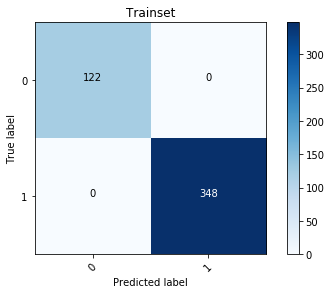

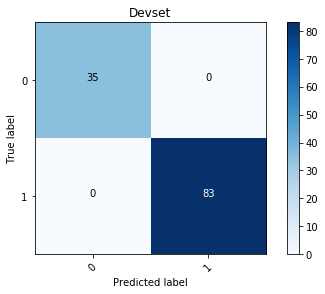

In [31]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from tputils import plot_confusion_matrix

def eval_dataset(y_true, y_pred, classes, title):
    print(title)
    
    f1 = f1_score(y_true, y_pred)
    print("f1 = {:.5f}".format(f1))

    conf_matrix = confusion_matrix(y_true, y_pred, labels=classes)
    plot_confusion_matrix(conf_matrix, classes,  normalize=False,title=title)
    
    print()


eval_dataset(y_train, y_train_pred, model.classes_, "Trainset")
eval_dataset(y_dev, y_dev_pred, model.classes_, "Devset")

## Notes
**I ran out of time so the fire risk is not ready.** 

Suggested TODOs:
- each fire is reported multiple times, so prediction of already reporoted fire based on history is easy. Maybe we should predict only new fires. Same fires would need to be identified (clustering?)
- area bins needsto be much smaller
- data generation more efficient
- there should be more features
- code should be better tested
- try different models and hyperparameters